In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
from pandas.plotting import autocorrelation_plot

In [2]:
np.random.seed(33)

T = 2000
t = np.arange(T+1) # observation times

r = np.random.randn(T)
phi = -0.4
theta = 0.6
d = 0.025

y = np.zeros(T+1)
y[0] = 100
y[1] = 100

# solo estac iniciando yo que pedo porque quiere que y1 tambien sea 100

delta_y = np.zeros(T)
delta_y[0] = y[1]-y[0]

for i in range(1,T):
    delta_y[i] = phi*(delta_y[i-1]-d)+r[i]+(theta*r[i-1])+d # verifica que este bien
    y[i+1] = y[i]+delta_y[i]
    

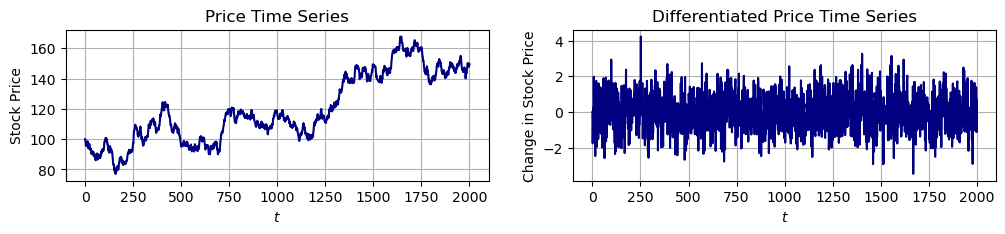

In [3]:
plot1 = plt.figure(1,figsize=(12,2), dpi=100)
plt.subplot(1,2,1)
plt.title('Price Time Series')
plt.xlabel('$t$')
plt.ylabel('Stock Price')
plt.plot(y,"navy")
plt.grid()

plt.subplot(1,2,2)
plt.title('Differentiated Price Time Series')
plt.xlabel('$t$')
plt.ylabel('Change in Stock Price')
plt.plot(delta_y,"navy")
plt.grid()
plt.savefig('TS1.png')

In [4]:
# to divide 70% for training and 30% for testing
p = .7
div = int(np.round(T*p))
yTrain = y[:div+1]
yTest = y[div+1:]

print(len(yTrain))
print(len(yTest))

delta_yTrain = delta_y[:div]
delta_yTest = delta_y[div:]
print(len(delta_yTrain))
print(len(delta_yTest))

1401
600
1400
600


In [5]:
mean = yTrain.mean()
stdd = yTrain.std()
print(mean,stdd)

106.6589024727968 12.988191979893855


In [6]:
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< Mean Reversion Strategy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [7]:
time_window = 97

acum = [0]
acum[0] = 0

#ma = np.zeros(len(yTest))
ma = np.zeros(len(y))

w = np.zeros(len(yTest))
cash = np.zeros(len(yTest))

cash[0] = 10000

for k in range(len(y)):
    acum.append(acum[k] + y[k])
    ma[k] = y[k]
    
    if k > time_window:
        ma[k] = (acum[k] - acum[k-time_window])/(time_window)
    
for i in range(len(yTest)-1):
    #acum.append(acum[i] + yTest[i])
    #ma[i] = yTest[i]
    
    #if i > time_window:
        #ma[i] = (acum[i] - acum[i-time_window])/(time_window)
    index = i+len(yTrain)    
    if (ma[index]+stdd) > yTest[i] and (ma[index]-stdd) < yTest[i]: # you do nothing
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if (ma[index]+stdd) < yTest[i]:  
        w[i+1] = 0
        cash[i+1] = w[i]*yTest[i] + cash[i]
        
    if (ma[index]-stdd) > yTest[i] or i == 0:
        #print(i,cash[i])
        cash[i+1] = 0
        w[i+1] = cash[i]/yTest[i]  + w[i] # es el numero de acciones que tienes
        
    
ma[index+1] = yTest[len(yTest)-1]

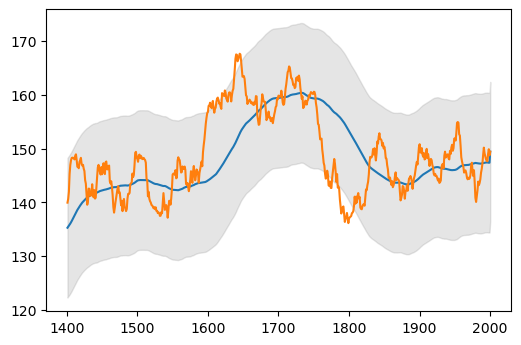

In [8]:
plot3 = plt.figure(3,figsize=(6,4), dpi=100)
plt.plot(t[1401:],ma[1401:])
plt.plot(t[1401:],yTest)

plt.fill_between(t[1401:], ma[1401:]-stdd, ma[1401:]+stdd,
                 facecolor="orange", # The fill color
                 color='gray',       # The outline color
                 alpha=0.2)

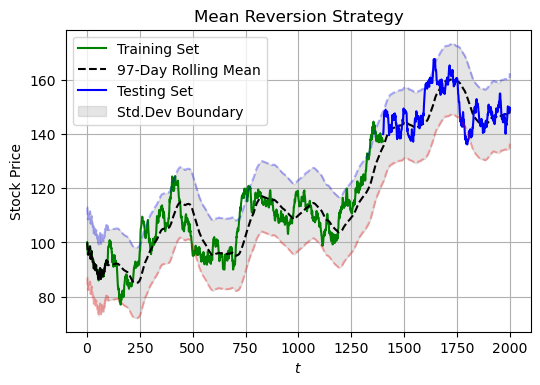

In [9]:
plot3 = plt.figure(3,figsize=(6,4), dpi=100)
plt.title('Mean Reversion Strategy')
plt.xlabel('$t$')
plt.ylabel('Stock Price')

plt.plot(t[:1401],yTrain,"g", label='Training Set')
plt.fill_between(t, ma-stdd, ma+stdd,
                 facecolor="orange", # The fill color
                 color='gray',       # The outline color
                 alpha=0.2, label='Std.Dev Boundary')
plt.plot(t,ma,"--k", label='97-Day Rolling Mean')
plt.plot(t[1401:],yTest,"b", label='Testing Set')
plt.plot(t,ma+stdd,"--b",alpha=0.3)
plt.plot(t,ma-stdd,"--r",alpha=0.3)
plt.legend()
plt.grid()
#plt.savefig('Mean-Reversion.png')


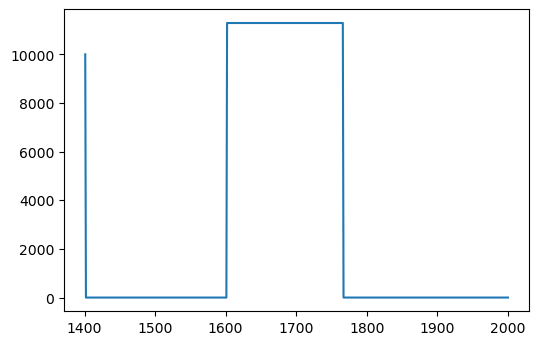

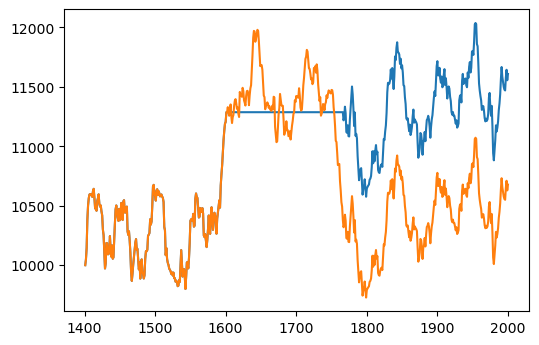

In [10]:
plot4 = plt.figure(4,figsize=(6,4), dpi=100)
plt.plot(t[1401:],cash)

strategy = [a*b for a,b in zip(w,yTest)]+ cash # No entendiste bien estoooo

plot5 = plt.figure(5,figsize=(6,4), dpi=100)
plt.plot(t[1401:], strategy)
plt.plot(t[1401:], 10000*yTest/yTest[0])

In [11]:
%precision %.2f
# What is the total return of my strategy? 
print("Mean R = ",(strategy[-1]-strategy[0])/strategy[0])
print("Buy and H = ",(y[-1]-y[1400])/y[1400])

# Saving Mean Reversion Strategy

MR_strategy = strategy

Mean R =  0.16084343548712712
Buy and H =  0.08855228832373342


In [12]:
# Iterate over time window to maximize returns
flag = 0

if flag ==1:
    maximum = 0
    for time_window in range(300):
        acum = [0]
        acum[0] = 0

        #ma = np.zeros(len(yTest))
        ma = np.zeros(len(yTrain))

        w = np.zeros(len(yTrain))
        cash = np.zeros(len(yTrain))

        cash[0] = 10000

        for i in range(len(yTrain)-1):
            acum.append(acum[i] + yTrain[i])
            ma[i] = yTrain[i]

            if i > time_window:
                ma[i] = (acum[i] - acum[i-time_window])/(time_window)
            index = i 
            if (ma[index]+stdd) > yTrain[i] and (ma[index]-stdd) < yTrain[i]: # you do nothing
                w[i+1] = w[i]
                cash[i+1] = cash[i]

            if (ma[index]+stdd) < yTrain[i]:  
                w[i+1] = 0
                cash[i+1] = w[i]*yTrain[i] + cash[i]

            if (ma[index]-stdd) > yTrain[i]:# or i == 0:
                #print(i,cash[i])
                cash[i+1] = 0
                w[i+1] = cash[i]/yTrain[i]  + w[i] # es el numero de acciones que tienes

        ma[index+1] = yTrain[len(yTrain)-1]

        strategy = [a*b for a,b in zip(w,yTrain)]+ cash # No entendiste bien estooo

        total_return = (strategy[-1]-strategy[0])/strategy[0]
        if total_return > maximum :
            maximum = total_return
            max_window = time_window
    print(max_window, maximum)


In [13]:
time_window = 97

acum = [0]
acum[0] = 0

#ma = np.zeros(len(yTest))
ma = np.zeros(len(yTrain))

w = np.zeros(len(yTrain))
cash = np.zeros(len(yTrain))

cash[0] = 10000

for i in range(len(yTrain)-1):
    acum.append(acum[i] + yTrain[i])
    ma[i] = yTrain[i]

    if i > time_window:
        ma[i] = (acum[i] - acum[i-time_window])/(time_window)
    index = i 
    if (ma[index]+stdd) > yTrain[i] and (ma[index]-stdd) < yTrain[i]: # you do nothing
        w[i+1] = w[i]
        cash[i+1] = cash[i]

    if (ma[index]+stdd) < yTrain[i]:  
        w[i+1] = 0
        cash[i+1] = w[i]*yTrain[i] + cash[i]

    if (ma[index]-stdd) > yTrain[i]:# or i == 0:
        #print(i,cash[i])
        cash[i+1] = 0
        w[i+1] = cash[i]/yTrain[i]  + w[i] # es el numero de acciones que tienes

ma[index+1] = yTrain[len(yTrain)-1]

strategy = [a*b for a,b in zip(w,yTrain)]+ cash # No entendiste bien estooo
MRT_strategy = strategy

print("Mean R = ",(MRT_strategy[-1]-MRT_strategy[0])/MRT_strategy[0])
print("Buy and H = ",(yTrain[-1]-yTrain[0])/yTrain[0])

Mean R =  0.45676363699400974
Buy and H =  0.37277038365842147


In [14]:
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ARIMA Strategy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ARIMA Strategy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< ARIMA Strategy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

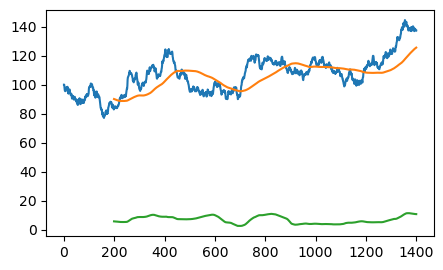

<Figure size 500x300 with 0 Axes>

In [15]:
df_y = pd.DataFrame(yTrain)
rolmean = df_y.rolling(window = 200).mean() #literal es moving average y moving std
rolstd = df_y.rolling(window = 200).std()

plot0 = plt.figure(0,figsize=(5,3), dpi=100)
plt.plot(t[:len(yTrain)],yTrain)
plt.plot(rolmean)
plt.plot(rolstd)

plot1 = plt.figure(1,figsize=(5,3), dpi=100)

In [16]:
# Dickey Fuller in the origina time Series

# Perform Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(yTrain, autolag="AIC") # Estamos haciendo Dickey Fuller con criterio de Akaique o como se escriba
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of observations Used"])

for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
    
print(dfoutput)


Test Statistic                   -1.137429
p-value                           0.699917
#Lags Used                        5.000000
Number of observations Used    1395.000000
Critical Value (1%)              -3.435046
Critical Value (5%)              -2.863614
Critical Value (10%)             -2.567874
dtype: float64


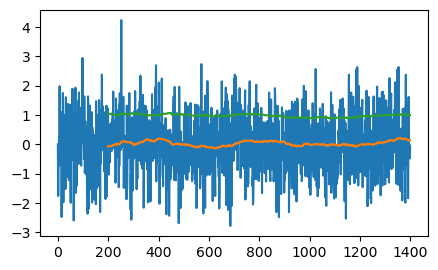

In [17]:
df_deltay = pd.DataFrame(delta_yTrain)
rolmean = df_deltay.rolling(window = 200).mean() #literal es moving average y moving std
rolstd = df_deltay.rolling(window = 200).std()

plot0 = plt.figure(0,figsize=(5,3), dpi=100)
plt.plot(delta_yTrain)
plt.plot(rolmean)
plt.plot(rolstd)

In [18]:
# Perform Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(delta_yTrain, autolag="AIC") # Estamos haciendo Dickey Fuller con criterio de Akaique o como se escriba
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of observations Used"])

for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
    
print(dfoutput)

#We can see that p-value is low, so we dont reject the null that the time series is not stationary

Test Statistic                -1.757393e+01
p-value                        4.038518e-30
#Lags Used                     3.000000e+00
Number of observations Used    1.396000e+03
Critical Value (1%)           -3.435043e+00
Critical Value (5%)           -2.863613e+00
Critical Value (10%)          -2.567873e+00
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


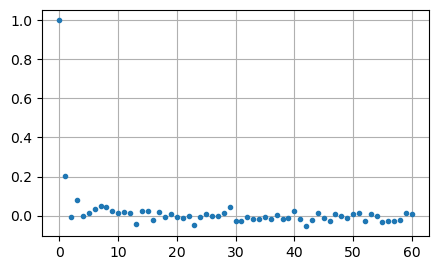

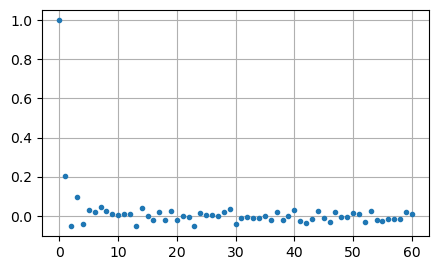

In [19]:
# ACF and PACD
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(delta_yTrain, nlags=60)
lag_pacf = pacf(delta_yTrain, nlags=60, method="ols") # Ordinary least square method

plot0 = plt.figure(0,figsize=(5,3), dpi=100)
plt.plot(lag_acf,".")
plt.grid()

plot1 = plt.figure(1,figsize=(5,3), dpi=100)
plt.plot(lag_pacf,".")
plt.grid()

Text(0.5, 1.0, 'RSS: 1288.4092')

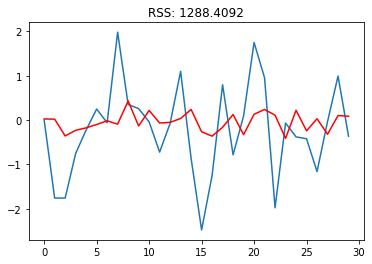

In [20]:
#p and q are both 2 because it is when it reaches below zero
from statsmodels.tsa.arima_model import ARIMA
#import statsmodels.api as sm

#ARIMA model
model = ARIMA(yTrain, order=(2,1,2)) #ellos usaron log y
results_ARIMA = model.fit()
plt.plot(delta_y[:30])
plt.plot(results_ARIMA.fittedvalues[:30], color="red")
plt.title("RSS: %.4f"% sum((results_ARIMA.fittedvalues-delta_yTrain)**2))

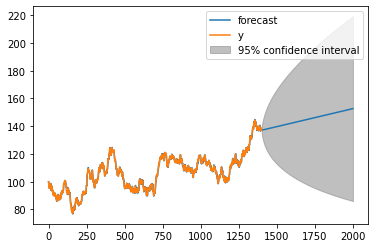

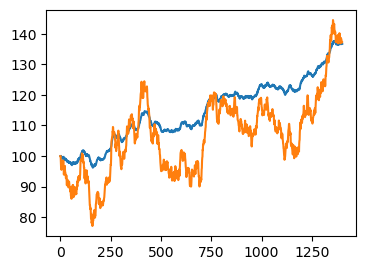

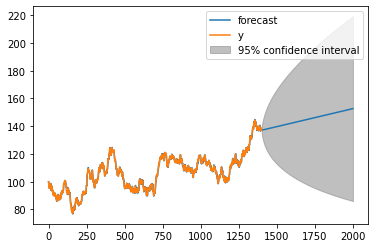

In [21]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

y_predict = np.zeros(len(yTrain)+1)
y_predict[0] = 100
y_predict[1] = 100

for i in range(2,len(yTrain)+1):
    y_predict[i] = y_predict[i-1]+predictions_ARIMA_diff[i-2]

plot1 = plt.figure(1,figsize=(4,3), dpi=100)
plt.plot(y_predict)
plt.plot(yTrain)
results_ARIMA.plot_predict(1,2000)

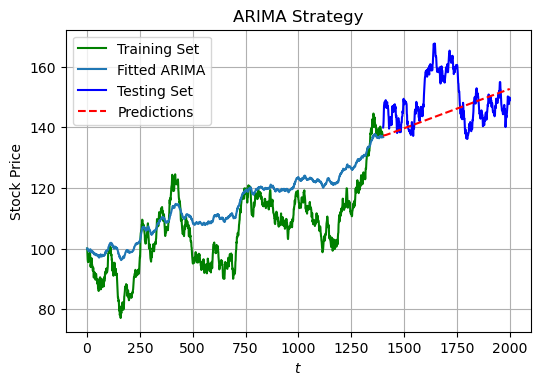

In [22]:
predictions = results_ARIMA.forecast(steps= 600)

plot1 = plt.figure(1,figsize=(6,4), dpi=100)
plt.title('ARIMA Strategy')
plt.xlabel('$t$')
plt.ylabel('Stock Price')


plt.plot(t[:1401],yTrain,"g", label='Training Set')
plt.plot(t[:1402],y_predict, label='Fitted ARIMA')
plt.plot(t[1401:],yTest,"b", label='Testing Set')
plt.plot(t[1401:],predictions[0],"--r",label="Predictions")
plt.legend()
plt.grid()
#plt.savefig('ARIMA.png')


In [23]:
# ARIMA TRADING
acum = [0]
acum[0] = 0

w = np.zeros(len(yTest))
cash = np.zeros(len(yTest))

cash[0] = 10000

for i in range(len(yTest)-2):
    if predictions[0][i+1] == yTest[i]: # you do nothing
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if predictions[0][i+1] < yTest[i]: #vendes      
        w[i+1] = 0
        cash[i+1] = w[i]*yTest[i] + cash[i]
        
    if predictions[0][i+1] > yTest[i]: # compras
        cash[i+1] = 0
        w[i+1] = cash[i]/yTest[i]  + w[i] # es el numero de acciones que tienes

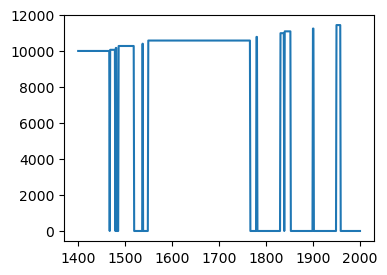

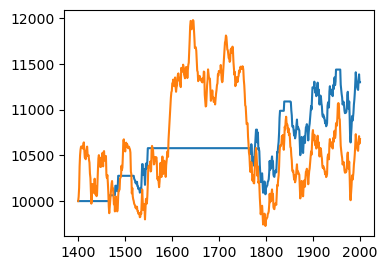

In [24]:
plot4 = plt.figure(4,figsize=(4,3), dpi=100)
plt.plot(t[1401:],cash)

strategy = [a*b for a,b in zip(w,yTest)]+ cash # No entendiste bien estoooo
strategy[599] = strategy[598]

plot5 = plt.figure(5,figsize=(4,3), dpi=100)
plt.plot(t[1401:], strategy)
plt.plot(t[1401:], cash[0]*yTest/yTest[0])

In [25]:
%precision %.2f
print("ARIMA = ",(strategy[-1]-strategy[0])/strategy[0])
%precision %.2f
print("Buy and H = ",(y[-1]-y[1400])/y[1400])

ARIMA_strategy = strategy

ARIMA =  0.12999467320511704
Buy and H =  0.08855228832373342


In [26]:
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< MA Crossover Strategy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< MA Crossover Strategy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< MA Crossover Strategy >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [27]:
# Iterate over time windows to maximize returns

flag = 0

if flag==1:
    maximum = 0


    for time_window in range(5,200,2):
        for time_window_long in range(75,400,4):
            acum = [0]
            acum[0] = 0

            ma = np.zeros(len(y))
            ma_long = np.zeros(len(y))


            #ma[k+1] = y[len(yTest)-1]
            #ma_long[k+1] = y[len(yTest)-1]

            w = np.zeros(len(yTrain))
            cash = np.zeros(len(yTrain))

            cash[0] = 10000

            for i in range(len(yTrain)-1): 

                acum.append(acum[i] + y[i])
                ma[i] = y[i]
                ma_long[i] = y[i]

                if i > time_window:
                    ma[i] = (acum[i] - acum[i-time_window])/(time_window)

                if i > time_window_long:
                    ma_long[i] = (acum[i] - acum[i-time_window_long])/(time_window_long)

                if ma[i] == y[i]: # you do nothing
                    w[i+1] = w[i]
                    cash[i+1] = cash[i]

                if ma[i] > ma_long[i]:         
                    w[i+1] = cash[i]/y[i]  + w[i]
                    cash[i+1] = 0

                if ma[i] < ma_long[i]: # vendes
                    cash[i+1] = w[i]*y[i] + cash[i]
                    w[i+1] = 0


            strategy = [a*b for a,b in zip(w,yTrain)]+ cash

            total_return = (strategy[-1]-strategy[0])/strategy[0]

            if total_return > maximum :
                maximum = total_return
                long = time_window_long
                short = time_window

    print(short,long)

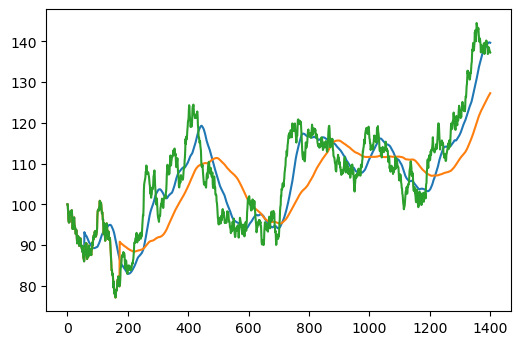

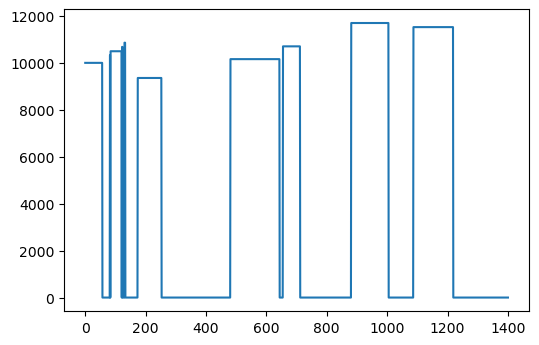

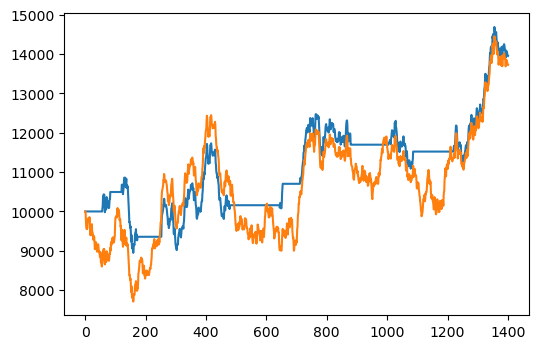

In [28]:
# Training Part

time_window = 55
time_window_long = 172
# Valores anteriores 200 y 50

acum = [0]
acum[0] = 0

ma = np.zeros(len(y))
ma_long = np.zeros(len(y))

for k in range(len(y)):
    acum.append(acum[k] + y[k])
    ma[k] = y[k]
    ma_long[k] = y[k]
    
    if k > time_window:
        ma[k] = (acum[k] - acum[k-time_window])/(time_window)
        
    if k > time_window_long:
        ma_long[k] = (acum[k] - acum[k-time_window_long])/(time_window_long)

#ma[k+1] = y[len(yTest)-1]
#ma_long[k+1] = y[len(yTest)-1]
        
w = np.zeros(len(yTrain))
cash = np.zeros(len(yTrain))

cash[0] = 10000

for i in range(len(yTrain)-1):        
    if ma[i] == y[i]: # you do nothing
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] > ma_long[i]:         
        w[i+1] = cash[i]/y[i]  + w[i]
        cash[i+1] = 0
        
    if ma[i] < ma_long[i]: # vendes
        cash[i+1] = w[i]*y[i] + cash[i]
        w[i+1] = 0


strategy = [a*b for a,b in zip(w,yTrain)]+ cash

plot0 = plt.figure(0,figsize=(6,4), dpi=100)
plt.plot(t[0:1401],ma[0:1401])
plt.plot(t[0:1401],ma_long[0:1401])
plt.plot(t[0:1401],yTrain)

plot1 = plt.figure(1,figsize=(6,4), dpi=100)
plt.plot(t[0:1401],cash)

plot2 = plt.figure(2,figsize=(6,4), dpi=100)
plt.plot(t[0:1401], strategy)
plt.plot(t[0:1401], cash[0]*yTrain/yTrain[0])

MA_Train_strategy = strategy

In [29]:
#Strategy Train [Here we checked which time windows maximazed the Strategy in the training set]
print("Strategy Train = ", (strategy[-1]-strategy[0])/strategy[0]) # Train
print("BAH Train = ",(y[1400]-y[0])/y[0])



Strategy Train =  0.39535258902337517
BAH Train =  0.37277038365842147


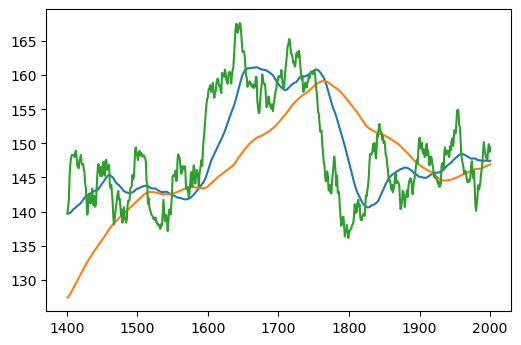

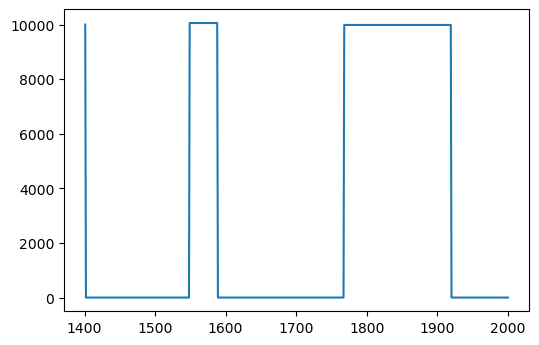

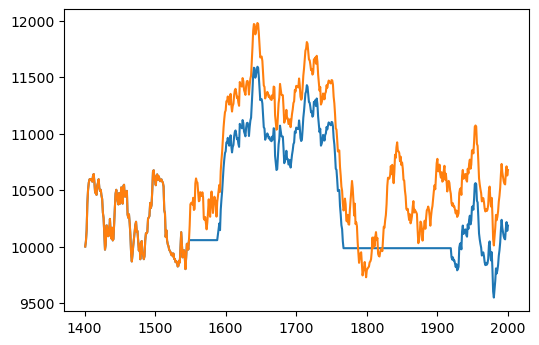

In [30]:
# Testing Part

w = np.zeros(len(yTest))
cash = np.zeros(len(yTest))

cash[0] = 10000


for i in range(len(yTest)-1):    
    s = len(yTrain) + i
    if ma[s] == y[s]: # you do nothing
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[s] > ma_long[s]:         
        w[i+1] = cash[i]/yTest[i]  + w[i]
        cash[i+1] = 0
        
    if ma[s] < ma_long[s]: # vendes
        cash[i+1] = w[i]*yTest[i] + cash[i]
        w[i+1] = 0


strategy = [a*b for a,b in zip(w,yTest)]+ cash

plot0 = plt.figure(0,figsize=(6,4), dpi=100)
plt.plot(t[1401:],ma[1401:])
plt.plot(t[1401:],ma_long[1401:])
plt.plot(t[1401:],yTest)

plot1 = plt.figure(1,figsize=(6,4), dpi=100)
plt.plot(t[1401:],cash)

plot2 = plt.figure(2,figsize=(6,4), dpi=100)
plt.plot(t[1401:], strategy)
plt.plot(t[1401:], cash[0]*yTest/yTest[0])

BH_strategy = cash[0]*yTest/yTest[0]
MA_strategy = strategy

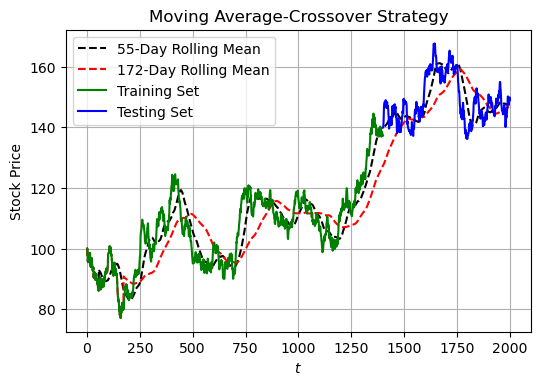

In [31]:
plot0 = plt.figure(0,figsize=(6,4), dpi=100)

plt.title('Moving Average-Crossover Strategy')
plt.xlabel('$t$')
plt.ylabel('Stock Price')

plt.plot(t,ma,"--k", label='55-Day Rolling Mean')
plt.plot(t,ma_long,"--r", label='172-Day Rolling Mean')
plt.plot(t[0:1401],yTrain,"g", label='Training Set')
plt.plot(t[1401:],yTest,"b", label='Testing Set')
plt.legend()
plt.grid()
#plt.savefig('MA-Cross.png')

In [32]:
print("Strategy Test = ", (strategy[-1]-strategy[0])/strategy[0]) # Train
print("BAH Test = ",(yTest[-1]-yTest[0])/yTest[0]) 

Strategy Test =  0.018535070449092746
BAH Test =  0.06777062521917075


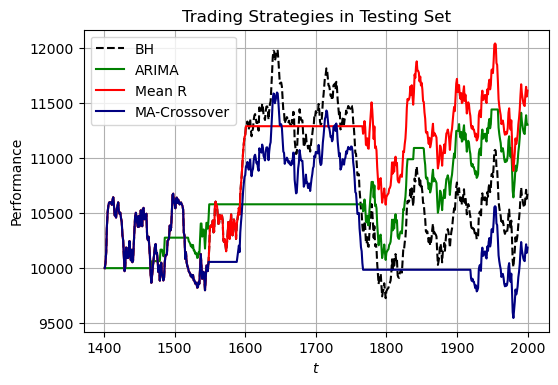

In [33]:
plot0 = plt.figure(0,figsize=(6,4), dpi=100)
plt.plot(t[1401:], cash[0]*yTest/yTest[0],"--",color = "black",label = "BH")
plt.plot(t[1401:], ARIMA_strategy,"green",label = "ARIMA")
plt.plot(t[1401:], MR_strategy,"red",label = "Mean R")
plt.plot(t[1401:], MA_strategy,"navy",label = "MA-Crossover")
plt.title('Trading Strategies in Testing Set')
plt.ylabel('Performance')
plt.xlabel('$t$')
plt.grid()
plt.legend()
#plt.savefig('Strategies.png')

In [34]:
# Print all the strategies
print(" Strategy Performance in Test set")
print("BAH = ",(yTest[-1]-yTest[0])/yTest[0]) 
print("Mean Reversion = ", (MR_strategy[-1]-MR_strategy[0])/MR_strategy[0])
print("ARIMA = ", (ARIMA_strategy[-1]-ARIMA_strategy[0])/ARIMA_strategy[0])
print("Crossover = ", (MA_strategy[-1]-MA_strategy[0])/MA_strategy[0])

BHT_strategy = 10000*yTrain/yTrain[0]

 Strategy Performance in Test set
BAH =  0.06777062521917075
Mean Reversion =  0.16084343548712712
ARIMA =  0.12999467320511704
Crossover =  0.018535070449092746


In [35]:
log_returns_MR = np.zeros(len(yTest)-1)
log_returns_ARIMA = np.zeros(len(yTest)-1)
log_returns_MA = np.zeros(len(yTest)-1)

log_returns_BH = np.zeros(len(yTest)-1)
log_returns_MAT = np.zeros(len(yTest)-1)

log_returns_MRT = np.zeros(len(yTest)-1)

log_returns_BHT = np.zeros(len(yTest)-1)

for i in range(len(yTest)-1):
    a = float(MR_strategy[i])
    b = float(MR_strategy[i+1])
    c = float(ARIMA_strategy[i])
    d = float(ARIMA_strategy[i+1])
    e = float(MA_strategy[i])
    f = float(MA_strategy[i+1])
    
    g = float(BH_strategy[i])
    h = float(BH_strategy[i+1])
    
    k = float(MA_Train_strategy[i])
    m = float(MA_Train_strategy[i+1])
    
    ab = float(MRT_strategy[i])
    ar = float(MRT_strategy[i+1])
    
    do = float(BHT_strategy[i])
    up = float(BHT_strategy[i+1])
    
    log_returns_MR[i] = np.log(b/a)
    log_returns_ARIMA[i] = np.log(d/c)
    log_returns_MA[i] = np.log(f/e)
    
    log_returns_BH[i] = np.log(h/g)
    
    log_returns_MAT[i] = np.log(m/k)
    
    log_returns_MRT[i] = np.log(ar/ab)
    
    log_returns_BHT[i] = np.log(up/do)
       


In [36]:
alpha = .95


sharp_MR = (log_returns_MR.mean()/log_returns_MR.std())*np.sqrt(252)
Var_MR = np.quantile(log_returns_MR,1-alpha)
es_MR=np.mean([[v]  for v in log_returns_MR if v < Var_MR])
conditional_sharp_MR = (log_returns_MR.mean()/es_MR)*np.sqrt(252)

sharp_ARIMA = (log_returns_ARIMA.mean()/log_returns_ARIMA.std())*np.sqrt(252)
Var_ARIMA = np.quantile(log_returns_ARIMA,1-alpha)
es_ARIMA=np.mean([[m]  for m in log_returns_ARIMA if m < Var_ARIMA])
conditional_sharp_ARIMA = (log_returns_ARIMA.mean()/es_ARIMA)*np.sqrt(252)

sharp_MA = (log_returns_MA.mean()/log_returns_MA.std())*np.sqrt(252)
Var_MA = np.quantile(log_returns_MA,1-alpha)
es_MA=np.mean([[h]  for h in log_returns_MA if h < Var_MA])
conditional_sharp_MA = (log_returns_MA.mean()/es_MA)*np.sqrt(252)

sharp_BH = (log_returns_BH.mean()/log_returns_BH.std())*np.sqrt(252)
Var_BH = np.quantile(log_returns_BH,1-alpha)
es_BH=np.mean([[g]  for g in log_returns_BH if g < Var_BH])
conditional_sharp_BH = (log_returns_BH.mean()/es_BH)*np.sqrt(252)

sharp_MAT = (log_returns_MAT.mean()/log_returns_MAT.std())*np.sqrt(252)
Var_MAT = np.quantile(log_returns_MAT,1-alpha)
es_MAT=np.mean([[s]  for s in log_returns_MAT if s < Var_MAT])
conditional_sharp_MAT = (log_returns_MAT.mean()/es_MAT)*np.sqrt(252)

sharp_MRT = (log_returns_MRT.mean()/log_returns_MRT.std())*np.sqrt(252)
Var_MRT = np.quantile(log_returns_MRT,1-alpha)
es_MRT=np.mean([[s]  for s in log_returns_MRT if s < Var_MRT])
conditional_sharp_MRT = (log_returns_MRT.mean()/es_MRT)*np.sqrt(252)

sharp_BHT = (log_returns_BHT.mean()/log_returns_BHT.std())*np.sqrt(252)
Var_BHT = np.quantile(log_returns_BHT,1-alpha)
es_BHT=np.mean([[s]  for s in log_returns_BH if s < Var_BHT])
conditional_sharp_BHT = (log_returns_BHT.mean()/es_BHT)*np.sqrt(252)

print("                                      Performance Indicator of each strategy")
print("-------------------------------------------------------------------------------------------------------------------")
print("Indicator               Mean Reversion.             ARIMA.              Crossover.                 Buy and Hold")
print("Sharpe Ratio        = ",sharp_MR," ",sharp_ARIMA," ",sharp_MA," ",sharp_BH)
print("Value at Risk      = ",Var_MR," ",Var_ARIMA," ",Var_MA," ",Var_BH)
print("Expected Shortfall = ",es_MR," ",es_ARIMA," ",es_MA," ",es_BH)
print("Conditional Sharpe  = ",conditional_sharp_MR," ",conditional_sharp_ARIMA," ",conditional_sharp_MA," ",conditional_sharp_BH)


                                      Performance Indicator of each strategy
-------------------------------------------------------------------------------------------------------------------
Indicator               Mean Reversion.             ARIMA.              Crossover.                 Buy and Hold
Sharpe Ratio        =  0.6160543851222295   0.7338110043979633   0.08415379299676037   0.24348117329691077
Value at Risk      =  -0.010548801885730529   -0.007660710068052259   -0.009672093428350698   -0.011194036880429983
Expected Shortfall =  -0.014148778413728436   -0.011253100952525715   -0.013543891633324276   -0.014722160385413264
Conditional Sharpe  =  -0.27936279080323706   -0.28781826390444254   -0.03593603203501392   -0.11803929477027858


(array([ 1.,  4.,  1.,  1.,  3., 10.,  6., 19., 25., 29., 26., 39., 38.,
        47., 53., 59., 49., 39., 34., 31., 23., 22., 15., 10.,  6.,  2.,
         4.,  1.,  0.,  2.]),
 array([-0.0220255 , -0.02053224, -0.01903898, -0.01754573, -0.01605247,
        -0.01455921, -0.01306595, -0.0115727 , -0.01007944, -0.00858618,
        -0.00709292, -0.00559967, -0.00410641, -0.00261315, -0.0011199 ,
         0.00037336,  0.00186662,  0.00335988,  0.00485313,  0.00634639,
         0.00783965,  0.00933291,  0.01082616,  0.01231942,  0.01381268,
         0.01530594,  0.01679919,  0.01829245,  0.01978571,  0.02127897,
         0.02277222]),
 <a list of 30 Patch objects>)

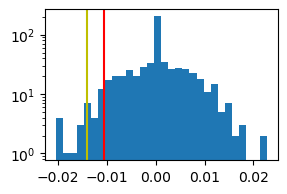

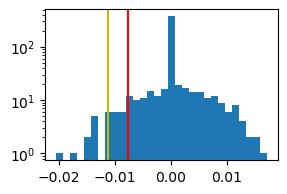

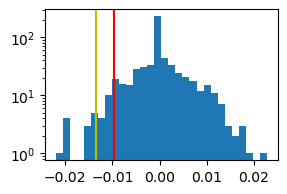

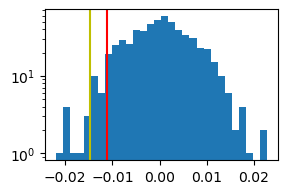

In [37]:
plot0 = plt.figure(0,figsize=(3,2), dpi=100)
plt.yscale('log')
plt.axvline(x=Var_MR,color='r')
plt.axvline(x=es_MR,color='y')
plt.hist(log_returns_MR, bins = 30)

plot1 = plt.figure(1,figsize=(3,2), dpi=100)
plt.axvline(x=Var_ARIMA,color='r')
plt.axvline(x=es_ARIMA,color='y')
plt.yscale('log')
plt.hist(log_returns_ARIMA, bins = 30)

plot2 = plt.figure(2,figsize=(3,2), dpi=100) 
plt.axvline(x=Var_MA,color='r')
plt.axvline(x=es_MA,color='y')
plt.yscale('log')
plt.hist(log_returns_MA, bins = 30)

plot3 = plt.figure(3,figsize=(3,2), dpi=100)
plt.axvline(x=Var_BH,color='r')
plt.axvline(x=es_BH,color='y')
plt.yscale('log')
plt.hist(log_returns_BH, bins = 30)

In [38]:
# Moving Average Train

print("Sharp Ratio        = ",sharp_MAT)
print("Value at Risk      = ",Var_MAT)
print("Expected Shortfall = ",es_MAT)
print("Conditional Sharp = ",conditional_sharp_MAT)

Sharp Ratio        =  0.056365696434141854
Value at Risk      =  -0.013518050261717724
Expected Shortfall =  -0.019088221290640563
Conditional Sharp =  -0.021850279844141427


In [39]:
# Mean Reversion Train
print("Sharp Ratio        = ",sharp_MRT)
print("Value at Risk      = ",Var_MRT)
print("Expected Shortfall = ",es_MRT)
print("Conditional Sharp = ",conditional_sharp_MRT)

Sharp Ratio        =  1.303132058415109
Value at Risk      =  -0.009772621069787693
Expected Shortfall =  -0.015006987126951385
Conditional Sharp =  -0.535705996490655


In [40]:
# Buy and Hold Train

print("Sharp Ratio        = ",sharp_BHT)
print("Value at Risk      = ",Var_BHT)
print("Expected Shortfall = ",es_BHT)
print("Conditional Sharp = ",conditional_sharp_BHT)

Sharp Ratio        =  0.03609607531224838
Value at Risk      =  -0.018051422004749993
Expected Shortfall =  -0.020642497456641894
Conditional Sharp =  -0.018265052059503892


In [41]:
from scipy.stats import t
p_value1 = t.sf(np.abs(sharp_MA),252-1)
p_value2 = t.sf(np.abs(sharp_MR),252-1)
p_value3 = t.sf(np.abs(sharp_ARIMA),252-1)
p_value4 = t.sf(np.abs(sharp_BH),252-1)
p_value5 = t.sf(np.abs(sharp_MRT),252-1)
p_value6 = t.sf(np.abs(sharp_MAT),252-1)
p_value7 = t.sf(np.abs(sharp_BHT),252-1)

In [42]:
print(p_value1)
print(p_value2)
print(p_value3)
print(p_value4)
print(p_value5)
print(p_value6)
print(p_value7)

0.4665006174819699
0.2692084460848597
0.23187440459678638
0.40391577220923935
0.09686191362121614
0.47754766320020453
0.48561722089326603


In [43]:
alpha = 0.05
FWER = 1 - (1- alpha)**3
print(FWER)

0.1426250000000001


In [44]:
bonferroni = alpha/3
print(bonferroni)

0.016666666666666666
